# Backpropagation Example
Use backpropagation to train a feedforward neural network to learn how to reproduce the output of another feedfoward neural network. 

As an experiment, training is repeated for several replications to see the variation in error rate convergence from multiple random starting value for the network parameters.

In [1]:
from backprop import *
from visualization_helpers import plot_errors

# Experiments
1. Train a network on the output of another network without any noise.
2. Train a network on the output of another network without with Gaussian noise added to the network output.

## Conclusions 
* training data convergence: for this size of network with a dense sample gradient descent converges consistently to a low error rate on the trainng data, whether or not noise is added to the observations.
* test data convergence: when no noise is added to the training data the network learns to reproduce the output consistently. A slightly lower level of accuracy is achieved when noise is added to the training data. Typically around 4.5E-5 and 7E-5 for test error without and with noise respectively. In some repetitions of the experiment test error dips around 20% of the way through the iteration limit and then the test error goes up as the number of iterations increases, indicating training has entered an overfitting phase.

# Experiment 1

In [2]:
k = 50
hidden = (5,4,7,3)
out = 10
n = 10000
x = np.random.randn(n, k)

activation = Logistic()
se = SquaredError()
network0 = LinearFeedForwardNetwork(k, hidden, out, activation)
y = network0.evaluate(x)

x_test = np.random.randn(n, k)
y_test = network0.evaluate(x_test)

replications = 10
iterations = 101
modulo_for_printing = 20

errors = list()
test_errors = list()
for r in range(replications):
    network = LinearFeedForwardNetwork(k, hidden, out, activation)
    errors.append(list())
    test_errors.append(list())
    print("================================")
    print(" Training Replication {}".format(r))
    print("================================")
    for i in range(iterations):
        error = network.backprop(se, x, y, 1.)
        errors[-1].append(error)
        test_error = np.mean(se.evaluate(network, x_test, y_test))
        test_errors[-1].append(test_error)
        if i % modulo_for_printing == 0:
            print("error: ", error)
            print("test error: ", test_error)

 Training Replication 0
error:  0.029831960577572363
test error:  0.029876668460533724
error:  4.813613524262698e-05
test error:  4.8801697022110835e-05
error:  4.382823610325611e-05
test error:  4.444422639905689e-05
error:  4.380721260347818e-05
test error:  4.442186212740238e-05
error:  4.38070071871378e-05
test error:  4.4421541549381924e-05
error:  4.380692871999942e-05
test error:  4.442145741013121e-05
 Training Replication 1
error:  0.057211315787535896
test error:  0.05724889574221368
error:  5.120497579903201e-05
test error:  5.1972467550312116e-05
error:  4.3870448831805596e-05
test error:  4.448680483194715e-05
error:  4.382088125365129e-05
test error:  4.443691151283799e-05
error:  4.382112235260957e-05
test error:  4.4437236514973434e-05
error:  4.382220710386977e-05
test error:  4.443835620590697e-05
 Training Replication 2
error:  0.043421082159117386
test error:  0.04342890920784962
error:  6.319500975663336e-05
test error:  6.389405952531283e-05
error:  4.397923388982

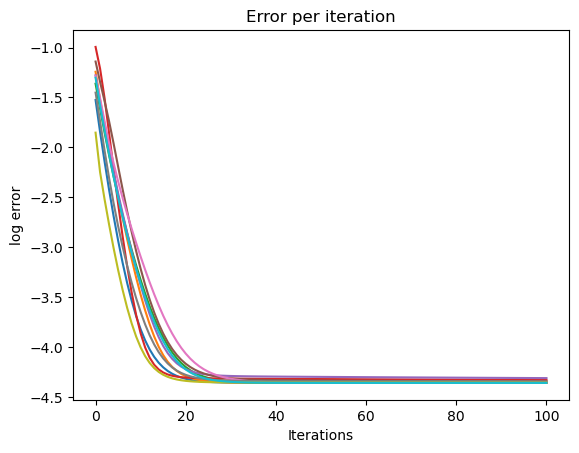

In [3]:
plot_errors(errors)

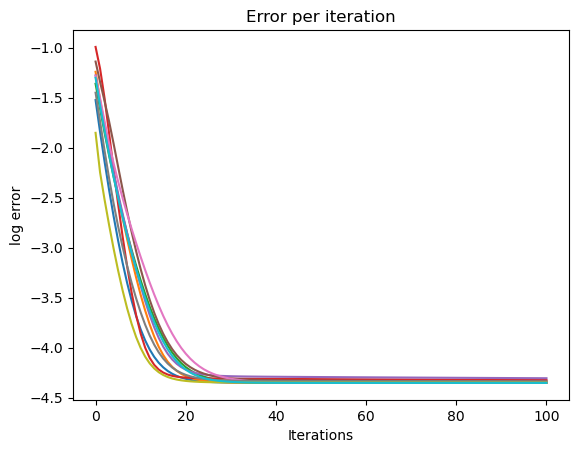

In [4]:
plot_errors(test_errors)

* looking at the errors on the log scale is important because training on data without any noise can converge very quickly
* we see that one of the training replications does not converge consistently even when networks are trained on the same sample

# Experiment 2

In [5]:
k = 50
hidden = (5,4,7,3)
out = 10
n = 10000
x = np.random.randn(n, k)

activation = Logistic()
se = SquaredError()
network0 = LinearFeedForwardNetwork(k, hidden, out, activation)
y = network0.evaluate(x) + np.random.randn(n, 1)

x_test = np.random.randn(n, k)
y_test = network0.evaluate(x_test)

replications = 10
iterations = 101
modulo_for_printing = 20

errors = list()
test_errors = list()
for r in range(replications):
    network = LinearFeedForwardNetwork(k, hidden, out, activation)
    errors.append(list())
    test_errors.append(list())
    print("================================")
    print(" Training Replication {}".format(r))
    print("================================")
    for i in range(iterations):
        error = network.backprop(se, x, y, 1.)
        errors[-1].append(error)
        test_error = np.mean(se.evaluate(network, x_test, y_test))
        test_errors[-1].append(test_error)
        if i % modulo_for_printing == 0:
            print("error: ", error)
            print("test error: ", test_error)

 Training Replication 0
error:  1.0367230536247638
test error:  0.025976112449484903
error:  1.0108056295148797
test error:  7.885906900525462e-05
error:  1.0107968239728624
test error:  7.168234482136284e-05
error:  1.0107966229753993
test error:  7.174372291181995e-05
error:  1.0107966148152356
test error:  7.178108409625833e-05
error:  1.0107966123259808
test error:  7.178798346138787e-05
 Training Replication 1
error:  1.0725303134056887
test error:  0.06189874172349774
error:  1.0108245219658463
test error:  9.740546318264216e-05
error:  1.0107973504082985
test error:  7.195990774011792e-05
error:  1.0107966609226022
test error:  7.171388153494314e-05
error:  1.0107966364385848
test error:  7.177598263634765e-05
error:  1.010796635534026
test error:  7.179176301056131e-05
 Training Replication 2
error:  1.048749195836249
test error:  0.03789008429316818
error:  1.0108043949835026
test error:  8.51806334566576e-05
error:  1.0108002192483878
test error:  8.152905313279918e-05
error:

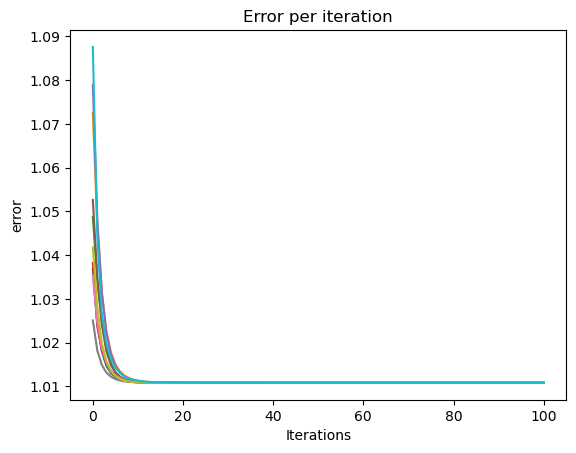

In [6]:
plot_errors(errors,use_log=False)

* we see that for all replications the error converges fairly quikcly to the baseline error rate. the baseline erorr rate of 1 is expected because we adding $N(0,1)$ noise the the network outputs.

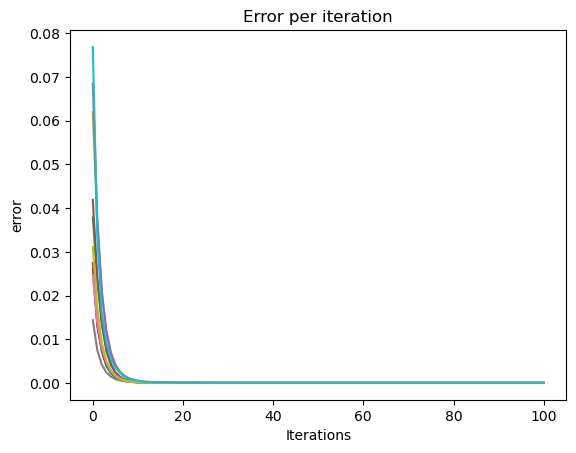

In [7]:
plot_errors(test_errors,use_log=False)

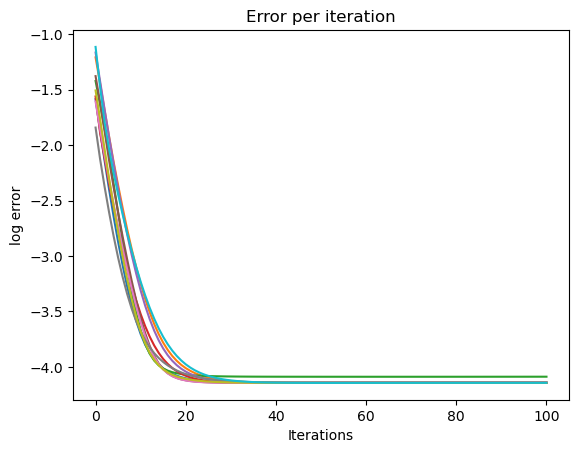

In [8]:
plot_errors(test_errors,use_log=True)